
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions


In [485]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [486]:
demand=pd.read_csv("D:/DS Training Videos/ML algo script/6.Time series/forecasting/DeliveryRate.csv")

In [487]:
demand.head()

,Month,DeliveryRate
0,13-Jan,70.28
1,13-Feb,69.47
2,13-Mar,78.90
3,13-Apr,74.56
4,13-May,76.73


In [488]:
demand.isnull().sum()

Month           0
DeliveryRate    0
dtype: int64

In [489]:
demand.dtypes

Month            object
DeliveryRate    float64
dtype: object

In [490]:
demand['Month_Date']=demand['Month'].str.split('-').str[0]

In [491]:
demand['Month_No']=demand['Month'].str.split('-').str[1].map({"Jan":"01","Feb":"02","Mar":"03","Apr":"04","May":"05","Jun":"06","Jul":"07","Aug":"08","Sep":"09","Oct":"10","Nov":"11","Dec":12})

In [492]:
demand['Year']="2020"

In [493]:
demand['Month_No'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       12], dtype=object)

In [494]:
demand.head()

,Month,DeliveryRate,Month_Date,Month_No,Year
0,13-Jan,70.28,13,01,2020
1,13-Feb,69.47,13,02,2020
2,13-Mar,78.90,13,03,2020
3,13-Apr,74.56,13,04,2020
4,13-May,76.73,13,05,2020


In [495]:
demand['Date']=demand['Month_Date'].astype(str)+'-'+demand['Month_No'].astype(str)+'-'+demand['Year'].astype(str)

In [496]:
demand.head()


,Month,DeliveryRate,Month_Date,Month_No,Year,Date
0,13-Jan,70.28,13,01,2020,13-01-2020
1,13-Feb,69.47,13,02,2020,13-02-2020
2,13-Mar,78.90,13,03,2020,13-03-2020
3,13-Apr,74.56,13,04,2020,13-04-2020
4,13-May,76.73,13,05,2020,13-05-2020


In [497]:
demand=demand.drop(['Month','Month_No','Year','Month_Date'],axis=1)

In [498]:
demand.head()

,DeliveryRate,Date
0,70.28,13-01-2020
1,69.47,13-02-2020
2,78.90,13-03-2020
3,74.56,13-04-2020
4,76.73,13-05-2020


In [499]:
demand['Date']=pd.to_datetime(demand['Date'])

In [500]:
#demand['Date']=demand['Date'].sort_values()

In [501]:
demand=demand.sort_values(by='Date',ascending=True)

In [502]:
demand.set_index('Date',inplace=True)

In [503]:
demand.head()

,DeliveryRate
Date,
2020-01-13,70.28
2020-01-14,82.95
2020-01-15,85.31
2020-02-13,69.47
2020-02-14,85.48


# Visualising the data

We could see data is not stationary which can be confirmed with following tests

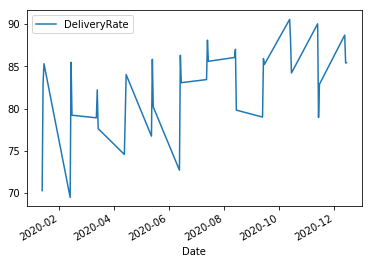

In [504]:
demand.plot()

# Test for Stationarity of data

1. Rolling mean and standard deviation plot
  - If Rolling mean and std are parallel to x-axis then we can say its stationary
2. Adf Test
  - If p<=0.05 we reject null hypothesis and do differencing until it satisfies adf test

# Rolling mean and standard deviation

In [505]:
rolling_mean = demand['DeliveryRate'].rolling(window = 12).mean()
rolling_std = demand['DeliveryRate'].rolling(window = 12).std()
#rolling_mean

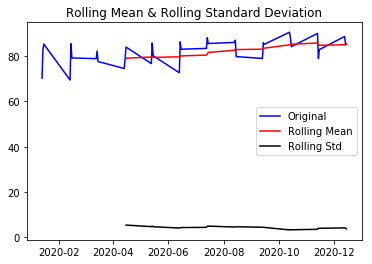

In [506]:
plt.plot(demand['DeliveryRate'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

# ADF Test

In [507]:
from statsmodels.tsa.stattools import adfuller

In [508]:
# Ho: It is non stationary
#H1: It is stationary

def adfuller_test(deliveryrate):
    result=adfuller(deliveryrate)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

# Differencing

In [509]:
demand['DeliveryRate'] = demand.DeliveryRate.diff()

In [510]:
adfuller_test(demand['DeliveryRate'].dropna())

ADF Test Statistic : -1.9229103565477825
p-value : 0.321361288954206
#Lags Used : 8
Number of Observations Used : 26
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [511]:
demand['DeliveryRate'] = demand.DeliveryRate.diff()

In [512]:
adfuller_test(demand['DeliveryRate'].dropna())

ADF Test Statistic : -5.435771248770987
p-value : 2.8479240630988873e-06
#Lags Used : 7
Number of Observations Used : 26
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [513]:
demand['DeliveryRate'].head()

Date
2020-01-13      NaN
2020-01-14      NaN
2020-01-15   -10.31
2020-02-13   -18.20
2020-02-14    31.85
Name: DeliveryRate, dtype: float64

In [514]:
demand=demand.dropna(axis=0, how='any')

In [515]:
demand.head()

,DeliveryRate
Date,
2020-01-15,-10.31
2020-02-13,-18.20
2020-02-14,31.85
2020-02-15,-22.28
2020-03-13,5.96


In [516]:
rolling_mean = demand['DeliveryRate'].rolling(window = 12).mean()
rolling_std = demand['DeliveryRate'].rolling(window = 12).std()
#rolling_mean

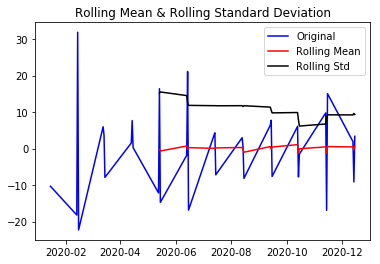

In [517]:
plt.plot(demand['DeliveryRate'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

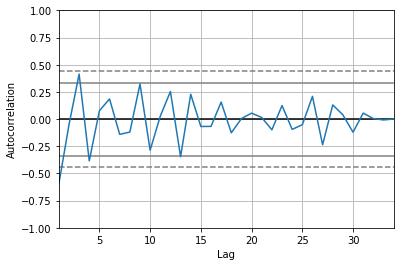

In [518]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(demand['DeliveryRate'])
plt.show()

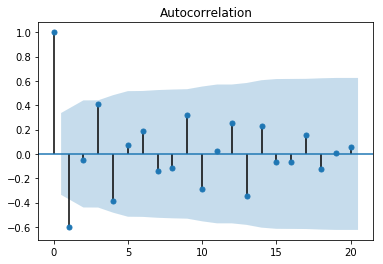

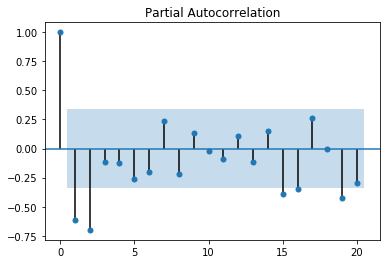

In [519]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(demand['DeliveryRate'],lags=20)
plt.show()
plot_pacf(demand['DeliveryRate'],lags = 20)
plt.show()

In [522]:
import pmdarima as pm
import warnings 
from pmdarima import auto_arima 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 
warnings.filterwarnings("ignore") 

In [523]:
training_percentage = 0.7
train_size = int(len(demand) * training_percentage)
train, test =demand[:train_size], demand[train_size:]

In [524]:
model = pm.auto_arima(demand['DeliveryRate'])                 

In [525]:
model

ARIMA(order=(2, 0, 2))

In [532]:
model=ARIMA(demand['DeliveryRate'],order=(2,0,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           DeliveryRate   No. Observations:                   34
Model:                     ARMA(2, 2)   Log Likelihood                -102.527
Method:                       css-mle   S.D. of innovations              4.300
Date:                Mon, 27 Jul 2020   AIC                            217.055
Time:                        12:41:15   BIC                            226.213
Sample:                             0   HQIC                           220.178
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0079      0.047     -0.169      0.866      -0.100       0.084
ar.L1.DeliveryRate    -1.3913      0.102    -13.651      0.000      -1.591      -1.192
ar.L2.DeliveryRate    -0.8156      0.110     -7.435      0.000      -1.031      -0.601
ma.L1.DeliveryRate -5.299e-08      0.018  -2.99e-06      1.000      -0.035       0.035
ma.L2.DeliveryRate    -1.0000      0.018    -56.491      0.000      -1.035      -0.965
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8529           -0.7061j            1.1073           -0.3899
AR.2           -0.8529           +0.7061j            1.1073            0.3899
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

In [533]:
start = len(train) 
end = len(train) + len(test) - 1  
pred= model_fit.predict(start,end,typ = 'levels').rename("Predictions")

In [534]:
rmse = np.mean((pred.values- test.values)**2)**.5  

#mean absolute error
mae = np.mean(np.abs(pred.values - test.values)) 
mape = np.mean(np.abs(pred.values- test.values)/np.abs(test.values))  # MAPE
print('rmse:',rmse)
print('mae:',mae)
print('mape:',mape)

rmse: 13.04601290840639
mae: 10.597450107124255
mape: 1.9553597902242357


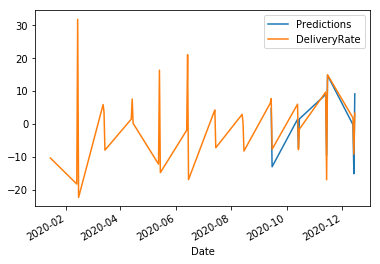

In [535]:
pred.plot(legend = True) 
demand['DeliveryRate'].plot(legend = True) 

In [536]:
from sklearn.metrics import r2_score
#test = pred['Predictions']
r2_score(test['DeliveryRate'].dropna(),pred)

0.7844119339643087

In [537]:
fc, se, confidence = model_fit.forecast(alpha=0.05,steps=10)  

In [538]:
fc

array([-3.18282934,  7.52854562, -7.90386452,  4.83088054, -0.30003206,
       -3.54808096,  5.15580542, -4.30475998,  1.75869054,  1.03881476])

In [539]:
pred

Date
2020-09-14     4.686257
2020-09-15   -12.955735
2020-10-13     1.475822
2020-10-14    -7.134734
2020-10-15     1.589842
2020-11-13     9.011004
2020-11-14    -9.455114
2020-11-15    14.835212
2020-12-13    -0.164622
2020-12-14   -15.091366
2020-12-15     9.207951
Name: Predictions, dtype: float64

In [540]:
#demand['forecast']=pd.Series(fc)

In [541]:
from pandas.tseries.offsets import DateOffset
future_dates=[demand.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [542]:
future_dates

[Timestamp('2020-12-15 00:00:00'),
 Timestamp('2021-01-15 00:00:00'),
 Timestamp('2021-02-15 00:00:00'),
 Timestamp('2021-03-15 00:00:00'),
 Timestamp('2021-04-15 00:00:00'),
 Timestamp('2021-05-15 00:00:00'),
 Timestamp('2021-06-15 00:00:00'),
 Timestamp('2021-07-15 00:00:00'),
 Timestamp('2021-08-15 00:00:00'),
 Timestamp('2021-09-15 00:00:00'),
 Timestamp('2021-10-15 00:00:00'),
 Timestamp('2021-11-15 00:00:00'),
 Timestamp('2021-12-15 00:00:00'),
 Timestamp('2022-01-15 00:00:00'),
 Timestamp('2022-02-15 00:00:00'),
 Timestamp('2022-03-15 00:00:00'),
 Timestamp('2022-04-15 00:00:00'),
 Timestamp('2022-05-15 00:00:00'),
 Timestamp('2022-06-15 00:00:00'),
 Timestamp('2022-07-15 00:00:00'),
 Timestamp('2022-08-15 00:00:00'),
 Timestamp('2022-09-15 00:00:00'),
 Timestamp('2022-10-15 00:00:00'),
 Timestamp('2022-11-15 00:00:00')]

In [543]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=demand.columns)

In [544]:
future_datest_df

,DeliveryRate
2021-01-15,NaN
2021-02-15,NaN
2021-03-15,NaN
2021-04-15,NaN
2021-05-15,NaN
2021-06-15,NaN
2021-07-15,NaN
2021-08-15,NaN
2021-09-15,NaN
2021-10-15,NaN


In [545]:
future_demand=pd.concat([demand,future_datest_df])

In [546]:
future_demand.shape

(57, 1)

In [547]:
future_demand.describe()

,DeliveryRate
count,34.000000
mean,-0.371471
std,11.813019
min,-22.280000
25%,-8.110000
50%,1.020000
75%,6.035000
max,31.850000
